In [163]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Read crypto_data.csv into Pandas

In [164]:
crypto_data = pd.read_csv(Path('crypto_data.csv'),index_col=0)
crypto_data.head()


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [165]:
crypto_data.dtypes


CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [166]:
df=crypto_data

Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. 

In [167]:
df_1=df.loc[df['IsTrading']==True,:]
df_1

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


Drop the IsTrading column from the dataframe.




In [168]:
df_2=df_1.drop(['IsTrading'],axis=1)
df_2.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


Remove all rows that have at least one null value

In [169]:
for column in df_2.columns:
    print(f"Column {column} has {df_2[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [170]:
df = df_2.dropna(how='any')


In [171]:
# Check for duplicates
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

In [172]:
df_3=df.loc[df['TotalCoinsMined']>0]
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


Data prepration for ML

In [173]:
# Remove the 'CoinName' column
coin_names=df_3['CoinName']
df_4=df_3.drop(columns=['CoinName'])
df_4.head()


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [174]:
df=df_4
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [175]:
# Convert 'TotalCoinSupply' to numeric
df['TotalCoinSupply'] = pd.to_numeric(df['TotalCoinSupply'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [176]:
# Use dummy variables for text columns
X = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()


(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(532, 98)


Dimensionality Reduction

In [178]:
#n_components = .90 means that scikit-learn will choose the minimum number 
#of principal components such that 90% of the variance is retained.
pca = PCA(n_components = .90)
crypto_pca = pca.fit_transform(X_scaled)
print(crypto_pca.shape)


(532, 74)


The number of features reduced from 98 to 74 with retaing 90% of the variance

Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [179]:
from sklearn.manifold import TSNE

In [187]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)

In [188]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)
print(tsne_features.shape)

(532, 2)


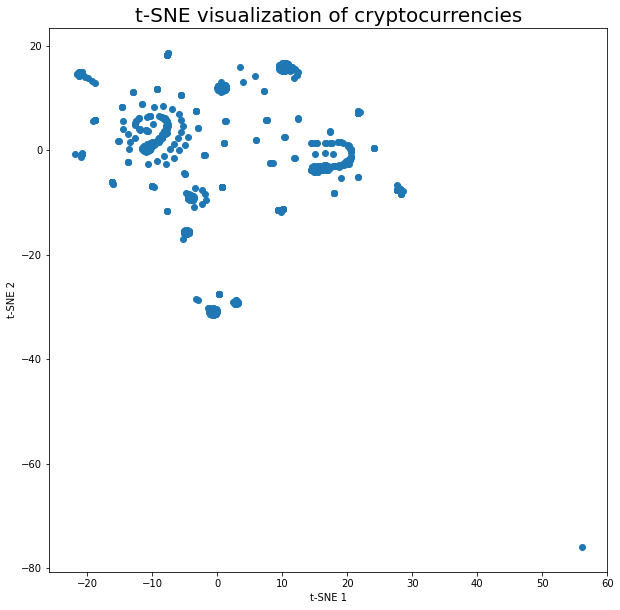

In [194]:
# Plot the results
plt.figure(num=None,figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.title('t-SNE visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
plt.show()

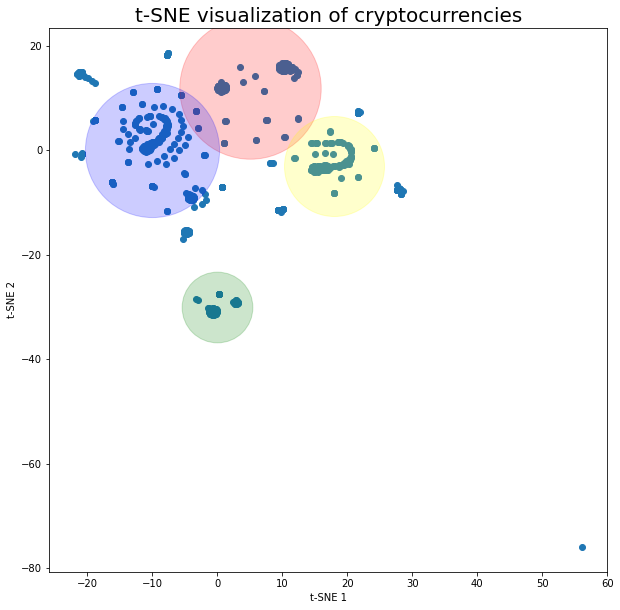

In [209]:
plt.figure(num=None,figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(tsne_features[:, 0], tsne_features[:, 1])
plt.title('t-SNE visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.scatter(5, 12, color = 'red', marker = 'o', s = 20000, alpha = 0.2)
plt.scatter(-10, 0, color = 'blue', marker = 'o', s = 18000, alpha = 0.2)
plt.scatter(18, -3, color = 'yellow', marker = 'o', s = 10000, alpha = 0.2)
plt.scatter(0, -30, color = 'green', marker = 'o', s = 5000, alpha = 0.2)
plt.show()

Four main clusters are shown in red, blue, yellow, and green circles. However, each of these large clusters contain at least one smaller cluster. For example, I can easily see 3 distinct clusters within the blue circle.

C:\Users\Neda\anaconda3_2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:xlabel='k'>

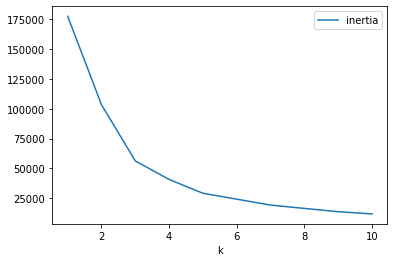

In [212]:
# Find the best value for k using the elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot(x='k', y='inertia', kind='line')

The elbow occurs at k=4 

In [213]:
# Perform clustering with k=4
km = KMeans(n_clusters=4, random_state=0)
km.fit(tsne_features)
predictions = km.predict(tsne_features)

Text(0, 0.5, 't-SNE 2')

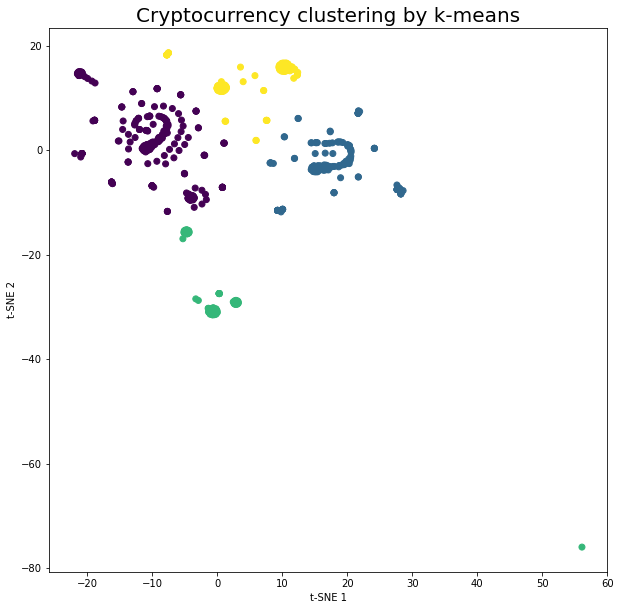

In [214]:
# Visualize the results
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c = predictions)
plt.title('Cryptocurrency clustering by k-means', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

The initial guess for clustering based on visualization after dimensionality reduction is supported by k_means clustering. Based on this data, it would be appropriate to cluster the data into 4 major categories.